In [274]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

In [275]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

<h1> Reading dataset </h1>

In [276]:
df=pd.read_csv("iris.csv")
print(df.head(10))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


# Dropping the variety column from the dataset

In [277]:
x=df.drop(['variety'], axis=1)
y=df['variety']
print(y.value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


# Kmeans Algorithm
## --Setosa        50
## --Versicolor    50
## --Virginica     50
## --using elbow method to find the number of optimal clusters

KMeans(n_clusters=1, n_init=10, random_state=101)

KMeans(n_clusters=2, n_init=10, random_state=101)

KMeans(n_clusters=3, n_init=10, random_state=101)

KMeans(n_clusters=4, n_init=10, random_state=101)

KMeans(n_clusters=5, n_init=10, random_state=101)

KMeans(n_clusters=6, n_init=10, random_state=101)

KMeans(n_clusters=7, n_init=10, random_state=101)

KMeans(n_init=10, random_state=101)

KMeans(n_clusters=9, n_init=10, random_state=101)

KMeans(n_clusters=10, n_init=10, random_state=101)

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'Elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'vlaue of wcss')

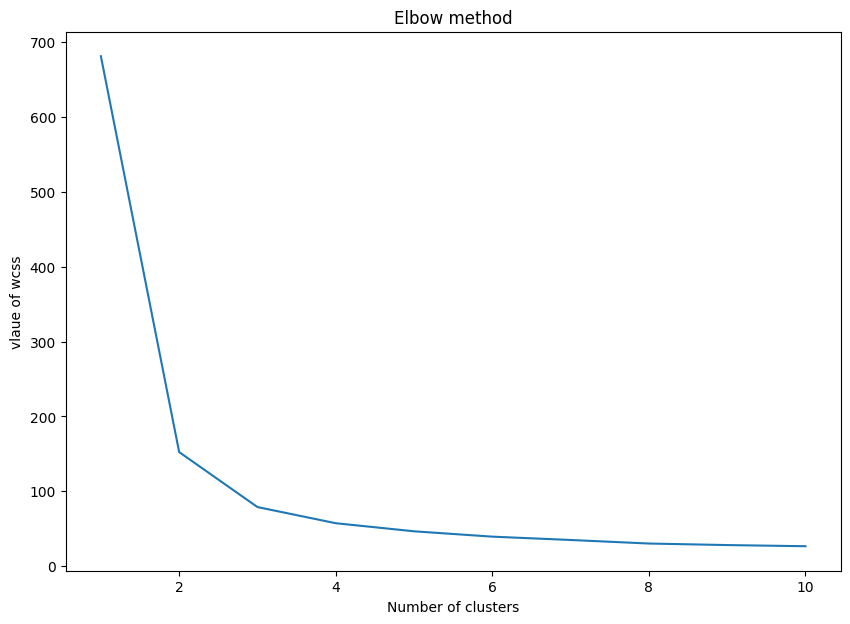

In [278]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("vlaue of wcss")
plt.show()

## The best number of clusters = 3

In [279]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=101)
y_pred = kmeans.fit_predict(x)

In [280]:
species = []

## Converting string to integer in species

In [281]:
for i in range(len(y)):
    if y[i] == "Setosa":
        species.append(0)
    elif y[i] == "Versicolor":
        species.append(1)
    else:
        species.append(2)

## Function to compute the frequency of each element in an array and sort it

In [282]:
def countFreq(arr, n):

   # Mark all array elements as not visited
   visited = [False for i in range(n)]
   element =[]
   element_count=[]
   kk=0
   # Traverse through array elements
   # and count frequencies
   for i in range(n):

     # Skip this element if already
     # processed
     if (visited[i] == True):
        continue

     # Count frequency
     count = 1
     element.append(arr[i])
     for j in range(i + 1, n, 1):
        if (arr[i] == arr[j]):
          visited[j] = True
          count += 1
     element_count.append(count)
   result=np.c_[element,element_count]
   result=result[result[:, 1].argsort()[::-1]]
   return result

## Concatenating species and the output of clustering

In [283]:
concatenated_array = np.c_[species,y_pred]
first_cluster= concatenated_array[y_pred == 0,0]
second_cluster= concatenated_array[y_pred == 1,0]
third_cluster= concatenated_array[y_pred == 2,0]
result_first =countFreq(first_cluster, len(first_cluster))
result_second=countFreq(second_cluster, len(second_cluster))
result_third =countFreq(third_cluster, len(third_cluster))
f_score = (result_first[0,1]+result_second[0,1]+result_third[0,1])/(len(y_pred))
print(f_score)

0.8933333333333333


# Hierarchical Algorithm
## Using Dendrogram to find the optimal number of clusters

## Dendrogram is a graphical representation of Hierarchical Clustering.
## More the vertical length of line in dendrogram, more the distance between the clusters.
## Dendrogram is help in finding the number of clusters.
## We set a threshold distance and draw a horizontal line.Then the number of clusters
## will be the number of vertical lines which are being intersected by the line drawn
## using the threshold.

Text(0.5, 1.0, 'Dendrogram')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Euclidean Distances')

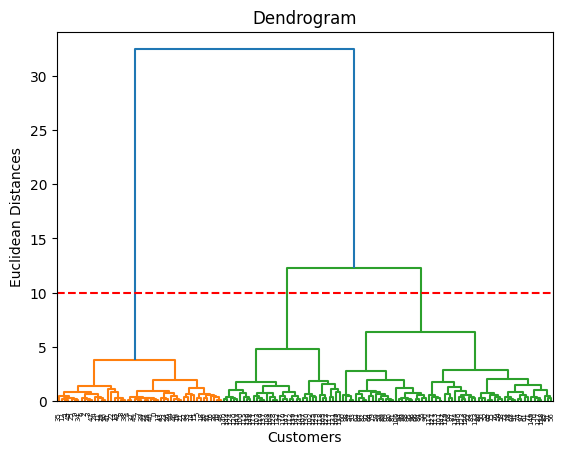

In [284]:
dendrogram  = hc.dendrogram(hc.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(10, c='r', linestyle='--')
plt.show()

## The best number of clusters = 3
## Fitting hierarchical clustering to the mall dataset

In [285]:
hc_Agg = AgglomerativeClustering(n_clusters = 3, linkage ='ward')
y_pred = hc_Agg.fit_predict(x)

## Concatenating species and the output of clustering

In [286]:
concatenated_array = np.c_[species,y_pred]
first_cluster= concatenated_array[y_pred == 0,0]
second_cluster= concatenated_array[y_pred == 1,0]
third_cluster= concatenated_array[y_pred == 2,0]
result_first =countFreq(first_cluster, len(first_cluster))
result_second=countFreq(second_cluster, len(second_cluster))
result_third =countFreq(third_cluster, len(third_cluster))
f_score = (result_first[0,1]+result_second[0,1]+result_third[0,1])/(len(y_pred))
print(f_score)

0.8933333333333333


# Gaussian Algorithm

In [287]:
#For creating elliptical-shaped clusters
from sklearn.datasets import make_blobs
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
#Graphing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import LogNorm
import seaborn as sns
#TSNE
from sklearn.manifold import TSNE

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.mixture import GaussianMixture
import scipy


## Find out how many GMM clusters using 'bic' and 'aic'.

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

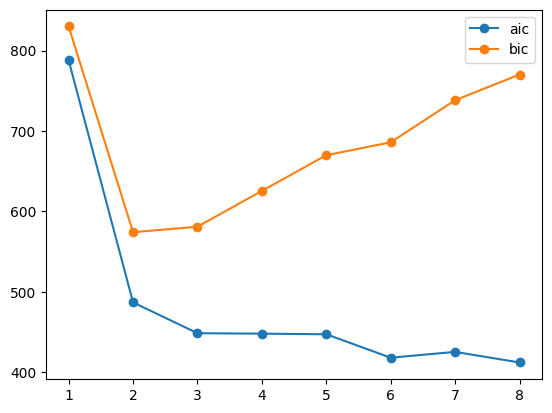

In [288]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                    max_iter = 100)
    gm.fit(x)
    bic.append(gm.bic(x))
    aic.append(gm.aic(x))
fig = plt.figure()

plt.plot(range(1, 9), aic,marker="o",label="aic")
plt.plot(range(1, 9), bic,marker="o",label="bic")
plt.legend()
plt.show()

## From above graphical representation.We will fix 3 clusters¶

In [289]:
gm = GaussianMixture(
    n_components=3,
    n_init=10,
    max_iter=50)
gm.fit(x)

y_pred=gm.predict(x)

GaussianMixture(max_iter=50, n_components=3, n_init=10)

## Concatenating species and the output of clustering

In [290]:
concatenated_array = np.c_[species,y_pred]
first_cluster= concatenated_array[y_pred == 0,0]
second_cluster= concatenated_array[y_pred == 1,0]
third_cluster= concatenated_array[y_pred == 2,0]
result_first =countFreq(first_cluster, len(first_cluster))
result_second=countFreq(second_cluster, len(second_cluster))
result_third =countFreq(third_cluster, len(third_cluster))
f_score = (result_first[0,1]+result_second[0,1]+result_third[0,1])/(len(y_pred))
print(f_score)

0.9666666666666667


# DBScan Algorithm

In [291]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## Determining parameters of the algorithm
## min_samples=2*dim=2 * 4=8

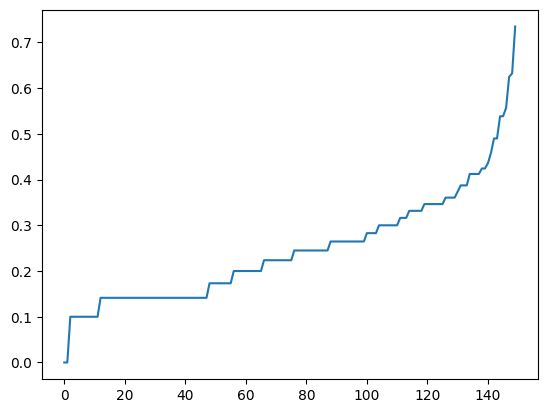

In [292]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

## Fit X_train on the DBSCAN algorithm with eps 0.39 and min_sample 8

In [293]:
clustering = DBSCAN(eps=0.39, min_samples=8).fit(x)

DBSCAN_dataset = x.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_
y_pred=clustering.labels_

## Concatenating species and the output of clustering

In [294]:
concatenated_array = np.c_[species,y_pred]
first_cluster= concatenated_array[y_pred == 0,0]
second_cluster= concatenated_array[y_pred == 1,0]
third_cluster= concatenated_array[y_pred == 2,0]
result_first =countFreq(first_cluster, len(first_cluster))
result_second=countFreq(second_cluster, len(second_cluster))
result_third =countFreq(third_cluster, len(third_cluster))
f_score = (result_first[0,1]+result_second[0,1]+result_third[0,1])/(len(y_pred))
print(f_score)

0.49333333333333335


# Conclusion: the results for this dataset were as shown: 
## Gaussian: 0.9666666666666667
## Kmeans: 0.8933333333333333
## Hierarchical: 0.8933333333333333
## DBScan: 0.49333333333333335